In [2]:
using Distributions
using BayesNets
using RDatasets
using Discretizers
titanic = dataset("/Users/siyu/Downloads/stanford-aa228-master/","titanic")
names(titanic)

8-element Array{Symbol,1}:
 :age               
 :portembarked      
 :fare              
 :numparentschildren
 :passengerclass    
 :sex               
 :numsiblings       
 :survived          

In [3]:
titanic_data = DataFrame(
    Age = titanic[:age],
    Portembarked = titanic[:portembarked],
    Fare = titanic[:fare],
    NPC = titanic[:numparentschildren],
    Class = titanic[:passengerclass],
    Sex = titanic[:sex],
    NS = titanic[:numsiblings],
    Survived = titanic[:survived]
)

,Age,Portembarked,Fare,NPC,Class,Sex,NS,Survived
1,1,1,1,1,1,1,1,1
2,2,2,1,1,2,2,1,2
3,1,1,1,1,1,2,1,2
4,2,1,1,1,2,2,1,2
5,2,1,1,1,1,1,1,1
6,2,3,1,1,1,1,1,1
7,3,1,1,1,2,1,1,1
8,1,1,1,1,1,1,2,1
9,2,1,1,2,1,2,1,2
10,1,2,1,1,3,2,1,2


In [4]:
titanic_data[1:3,:]

,Age,Portembarked,Fare,NPC,Class,Sex,NS,Survived
1,1,1,1,1,1,1,1,1
2,2,2,1,1,2,2,1,2
3,1,1,1,1,1,2,1,2


In [5]:
sort!(titanic_data, cols=:Survived)

,Age,Portembarked,Fare,NPC,Class,Sex,NS,Survived
1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,1,1,1
3,2,3,1,1,1,1,1,1
4,3,1,1,1,2,1,1,1
5,1,1,1,1,1,1,2,1
6,1,1,1,1,1,1,1,1
7,2,1,1,3,1,1,1,1
8,1,1,1,1,1,2,1,1
9,1,3,1,1,1,1,2,1
10,2,1,1,1,1,2,1,1


In [6]:
counts(titanic_data[:Survived])

2-element Array{Int64,1}:
 549
 340

In [7]:
counts(titanic_data[:NPC])

3-element Array{Int64,1}:
 794
  85
  10

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{BayesNets.CPDs.CPD}, ::Int64) at ./deprecated.jl:57
 [3] fit(::Type{BayesNets.BayesNet{BayesNets.CPDs.CPD}}, ::DataFrames.DataFrame, ::BayesNets.K2GraphSearch) at /Users/siyu/.julia/v0.6/BayesNets/src/learning.jl:232
 [4] fit(::Type{BayesNets.BayesNet}, ::DataFrames.DataFrame, ::BayesNets.K2GraphSearch) at /Users/siyu/.julia/v0.6/BayesNets/src/learning.jl:257
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/siyu/.julia/v0.6/IJulia/src/execute_request.jl:160
 [7] eventloop(::ZMQ.Socket) at /Users/siyu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##11#14)() at ./task.jl:335
while loading In[8], in expression starting on line 4
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64, ::Int64) at ./deprecated.jl:57
 [3] #fit#20(::Float64, ::Function, ::Type{BayesNets.CPDs.LinearGauss

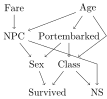

In [8]:
params = K2GraphSearch([:Age, :Portembarked, :Fare, :NPC, :Class, :Sex, :NS, :Survived], 
                       LinearGaussianCPD,
                       max_n_parents=2)
bn=fit(BayesNet, titanic_data, params)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}}}, ::Int64) at ./deprecated.jl:57
 [3] fit(::Type{BayesNets.BayesNet}, ::DataFrames.DataFrame, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}, ::Type{BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}}}) at /Users/siyu/.julia/v0.6/BayesNets/src/learning.jl:17
 [4] fit(::Type{BayesNets.BayesNet{BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}}}}, ::DataFrames.DataFrame, ::NTuple{11,Pair{Symbol,Symbol}}) at /Users/siyu/.julia/v0.6/BayesNets/src/learning.jl:48
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/siyu/.julia/v0.6/IJulia/src/execute_request.jl:160
 [7] eventloop(::ZMQ.Socket) at /Users/siyu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##11#14)() at ./task.jl:335
while loading In[10], in expression starting on line 1
Stacktr

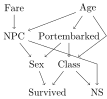

In [10]:
folkbn = fit(DiscreteBayesNet, titanic_data, (:Fare=>:NPC, :NPC=>:Sex, :Sex=>:Survived, :NPC=>:NS, :Age=>:NPC, :Age=>:Portembarked, :Portembarked=>:Sex, :Portembarked=>:Class, :Class=>:Survived, :Class=>:NS, :Age=>:Class))



In [11]:
bayesian_score(folkbn, titanic_data)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array{Int64,1}}, ::Int64) at ./deprecated.jl:57
 [3] bayesian_score(::BayesNets.BayesNet{BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}}}, ::DataFrames.DataFrame, ::BayesNets.UniformPrior) at /Users/siyu/.julia/v0.6/BayesNets/src/DiscreteBayesNet/structure_scoring.jl:68
 [4] bayesian_score(::BayesNets.BayesNet{BayesNets.CPDs.CategoricalCPD{Distributions.Categorical{Float64}}}, ::DataFrames.DataFrame) at /Users/siyu/.julia/v0.6/BayesNets/src/DiscreteBayesNet/structure_scoring.jl:67
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/siyu/.julia/v0.6/IJulia/src/execute_request.jl:160
 [7] eventloop(::ZMQ.Socket) at /Users/siyu/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##11#14)() at ./task.jl:335
while loading In[11], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.

-4052.208210689849

In [12]:
cpdFare = fit(StaticCPD{Categorical}, titanic_data, :Fare)

BayesNets.CPDs.StaticCPD{Distributions.Categorical{Float64}}(:Fare, Symbol[], Distributions.Categorical{Float64}(K=3, p=[0.977503, 0.0191226, 0.00337458]))

In [13]:
cpdAge = fit(StaticCPD{Categorical}, titanic_data, :Age)

BayesNets.CPDs.StaticCPD{Distributions.Categorical{Float64}}(:Age, Symbol[], Distributions.Categorical{Float64}(K=3, p=[0.35883, 0.586052, 0.0551181]))

In [14]:
cpdNPC = fit(StaticCPD{Categorical}, titanic_data, :NPC, [:Fare, :Age])

BayesNets.CPDs.StaticCPD{Distributions.Categorical{Float64}}(:NPC, Symbol[:Fare, :Age], Distributions.Categorical{Float64}(K=3, p=[0.893138, 0.095613, 0.0112486]))

In [15]:
cpdNPC(Assignment(:Fare=>1, :Age=>1))

Distributions.Categorical{Float64}(K=3, p=[0.893138, 0.095613, 0.0112486])

In [16]:
pdf(cpdNPC, Assignment(:Fare=>1, :Age=>1, :NPC=>3))

0.01124859392575928